In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from AutoValidator.model_tester import ModelTester
from utils.progress import ProgressBar
progress = ProgressBar()

In [4]:
data = pd.read_csv('data/filter_data.csv')
hurst_estimates = pd.read_csv('data/hurst_estimates.csv')
hurst_estimates.set_index('Unnamed: 0', inplace=True)

## Model - sliding window

In [5]:
from sklearn.svm import SVR

In [6]:
svr = SVR(verbose=True)

In [16]:
def xy_backtest(X, y, start, step_size):
    step = step_size
    start = int(start * len(X))
    splits = np.arange(start, len(X), step)
    
    results = []
    
    for test_start, test_end in zip(splits[:-1], splits[1:]):
        results.append((X[:test_start], X[test_start:test_end], y[:test_start], y[test_start:test_end]))
        
    return results

In [17]:
horizon = 5

[24000 32000]
(24000, 5) (8000, 5) (24000,) (8000,)
[LibSVM]

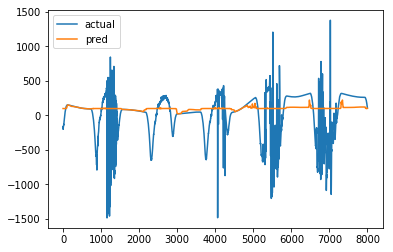

In [27]:
for column in data.columns[:1]:
    col = data[column].values.flatten()
    indexer = np.arange(horizon)[None, :] + np.arange(len(col) - 2 * horizon)[:, None]
    X = col[indexer]
    
    y = col[np.arange(horizon, len(col) - horizon)]
    
    X, y = X[:40000], y[:40000]
    
    for (X_train, X_test, y_train, y_test) in xy_backtest(X, y, 0.6, int(0.8 * len(X)) // 4):
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        svr.fit(X_train, y_train)
        pred = svr.predict(X_test)
        
        plt.plot(y_test)
        plt.plot(pred)
        plt.legend(['actual', 'pred'])
        break


In [26]:
X[100], y[100]

(array([28.715, 28.647, 28.578, 28.509, 28.44 ]), 28.37400000000007)

In [37]:
indexer

array([[    0,     1,     2, ...,    57,    58,    59],
       [    1,     2,     3, ...,    58,    59,    60],
       [    2,     3,     4, ...,    59,    60,    61],
       ...,
       [86135, 86136, 86137, ..., 86192, 86193, 86194],
       [86136, 86137, 86138, ..., 86193, 86194, 86195],
       [86137, 86138, 86139, ..., 86194, 86195, 86196]])

In [35]:
len(col)

86258

In [18]:
indexer = np.arange(10)[None, :] + np.arange(100)[:, None]

In [19]:
indexer

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  4,   5,   6,   7,   8,   9,  10,  11,  12,  13],
       [  5,   6,   7,   8,   9,  10,  11,  12,  13,  14],
       [  6,   7,   8,   9,  10,  11,  12,  13,  14,  15],
       [  7,   8,   9,  10,  11,  12,  13,  14,  15,  16],
       [  8,   9,  10,  11,  12,  13,  14,  15,  16,  17],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17,  18],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21],
       [ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22],
       [ 14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 15,  16,  17,  18,  19,  20,  21,  22,  23,  24],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25

In [7]:
horizon = 1
features = featureNames + ['pred+' + str(i) for i in range(1, horizon + 1)]

oneMinModels = []
oneMinResults = pd.DataFrame(np.zeros((len(data.columns), num_backtest_splits)), index=data.columns, columns=['SVR_RMSE_' + str(i) for i in range(0, num_backtest_splits)]) # table of [column name] x [repr(model)_RMSE]

NameError: name 'featureNames' is not defined

In [45]:
for column in data.columns:
    print(column)
    d_table = create_2d_table(data=data[column], features=features, offset=5 * oneDay)
    add_to_predict_2d(df=d_table, data=data[column], offset=5 * oneDay, horizon=horizon)
    add_features_2d(df=d_table, data=data[column], numSingle=numSingle, offset=5 * oneDay, periods=periods)

    # Split into X and y
    to_pred = ['pred+' + str(i) for i in range(1, horizon + 1)]
    XNames = list(set(features) - set(to_pred))
    yNames = to_pred
    X = d_table[XNames]
    y = d_table[yNames]
    
    # Backtest 10 times
    errors = np.zeros(num_backtest_splits)
    for backtest_ind, (X_train, X_test, y_train, y_test) in enumerate(backtest(X, y, oneDay * 5, num_backtest_splits)):
        # Create and train a model
        model = MultiOutputRegressor(LGBMRegressor())
        model.fit(X_train.values, y_train.values[:, :horizon])

        errors[backtest_ind] = evaluate_model(data=data[column], model=model, X_test=X_test, y_test=y_test)['RMSE'][0]

    print()
    print(errors)
    
    oneMinResults.loc[column] = errors
    oneMinModels.append(model)
    
oneMinResults['average'] = oneMinResults.mean(numeric_only=True, axis=1)

window_1_0
(86258,)
1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 350, 500, 1440, 2880, 7200, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
[66.84364384 51.7705029  53.75218733 59.43988743 53.45227523 38.52014126
 66.97006189 63.65652358 44.46764829 45.00400865]
window_1_1
(86258,)
1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 350, 500, 1440, 2880, 7200, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
[99.2872727  64.43007956 41.08396721 50.04410881 67.74605046 65.61930666
 70.63077949 62.62522566 53.14838013 39.01842829]
window_1_2
(86258,)
1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 350, 500, 1440, 2880, 7200, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
[86.44669514 72.1658685  40.68652595 50.60883296 62.60037555 56.93873438
 64.73753583 34.91992006 50.13659876 49.17774242]
window_1_3
(86258,)
1, 5, 10, 20, 30, 40, 5

1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 350, 500, 1440, 2880, 7200, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
[98.16805262  8.05929586 18.0825242   6.65034394  5.36485646  2.22158149
 16.8538219   7.43646095  5.75773928  9.66047615]
window_45_7
(86258,)
1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 350, 500, 1440, 2880, 7200, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
[13.74058422 44.06648974  8.95527413 12.06651243  7.96171472  7.67473626
  5.4578236   6.08721325 12.58664403 19.80936383]
window_45_8
(86258,)
1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 350, 500, 1440, 2880, 7200, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
[22.81372349 22.59323986 14.59282638  6.56651082  6.68325167  5.86645366
 12.32194848  7.28544959 10.73805347  9.74690328]
window_45_9
(86258,)
1, 5, 10, 20, 30, 40, 50, 60, 100, 200, 

In [46]:
oneMinResults.head()

,LGBMRegressor_RMSE_0,LGBMRegressor_RMSE_1,LGBMRegressor_RMSE_2,LGBMRegressor_RMSE_3,LGBMRegressor_RMSE_4,LGBMRegressor_RMSE_5,LGBMRegressor_RMSE_6,LGBMRegressor_RMSE_7,LGBMRegressor_RMSE_8,LGBMRegressor_RMSE_9,average
window_1_0,66.843644,51.770503,53.752187,59.439887,53.452275,38.520141,66.970062,63.656524,44.467648,45.004009,54.387688
window_1_1,99.287273,64.430080,41.083967,50.044109,67.746050,65.619307,70.630779,62.625226,53.148380,39.018428,61.363360
window_1_2,86.446695,72.165868,40.686526,50.608833,62.600376,56.938734,64.737536,34.919920,50.136599,49.177742,56.841883
window_1_3,108.721851,85.195461,94.013822,51.648532,57.522235,48.858497,50.176951,47.904900,60.225497,77.775502,68.204325
window_1_4,109.694507,87.954771,74.913005,83.711026,51.957512,48.149593,44.500598,58.004855,50.804175,64.515476,67.420552


<IPython.core.display.Javascript object>


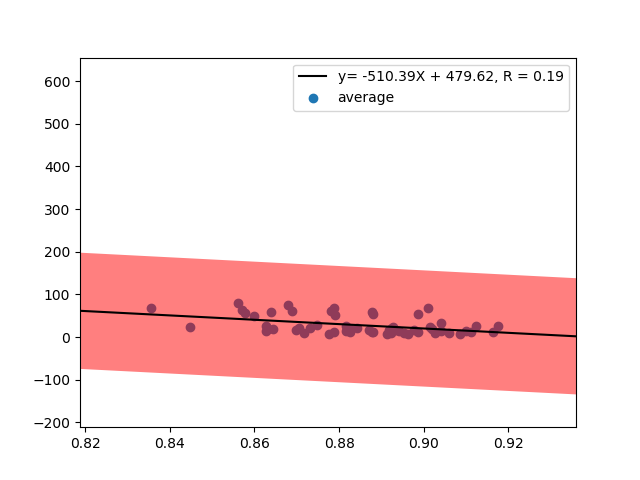

In [62]:
compare_hurst(hurst_estimates, oneMinResults)

In [53]:
# oneMinResults.to_csv('results/one_minute_boosted_tree_results.csv')
# pickle.dump(oneMinModels, open('results/one_minute_boosted_tree_models', 'wb+'))